In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
# test_dir  = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/Dataset" /content/
train_dir = '/content/Dataset/Train'
test_dir = '/content/Dataset/Test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2500 images belonging to 5 classes.
Found 154 images belonging to 5 classes.


In [ ]:
model = models.Sequential([
    # --- Blok 1 ---
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # --- Blok 2 ---
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # --- Blok 3 ---
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # --- Blok 4 ---
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # --- Blok 5
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 kelas: Early, Partially, Ripe, Rotten, Unripe
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,705,157 (6.50 MB)

 Trainable params: 1,703,173 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint('best_mango_cnn.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6, verbose=1)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,
    callbacks=[es, mc, lr]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.5846 - loss: 1.3631
Epoch 1: val_accuracy improved from -inf to 0.20130, saving model to best_mango_cnn.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 606ms/step - accuracy: 0.5860 - loss: 1.3592 - val_accuracy: 0.2013 - val_loss: 2.1016 - learning_rate: 1.0000e-04
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.8161 - loss: 0.7809
Epoch 2: val_accuracy did not improve from 0.20130
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 470ms/step - accuracy: 0.8161 - loss: 0.7806 - val_accuracy: 0.2013 - val_loss: 2.4213 - learning_rate: 1.0000e-04
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.8324 - loss: 0.7518
Epoch 3: val_accuracy did not improve from 0.20130
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 469ms/step - accuracy: 0.8325 - loss: 0.7514 - val_accuracy: 0.2013 - val_loss: 3.3476 - learning_rate: 1.0000e-04
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.8535 - loss: 0.6780
Epoch 4: val_accuracy 

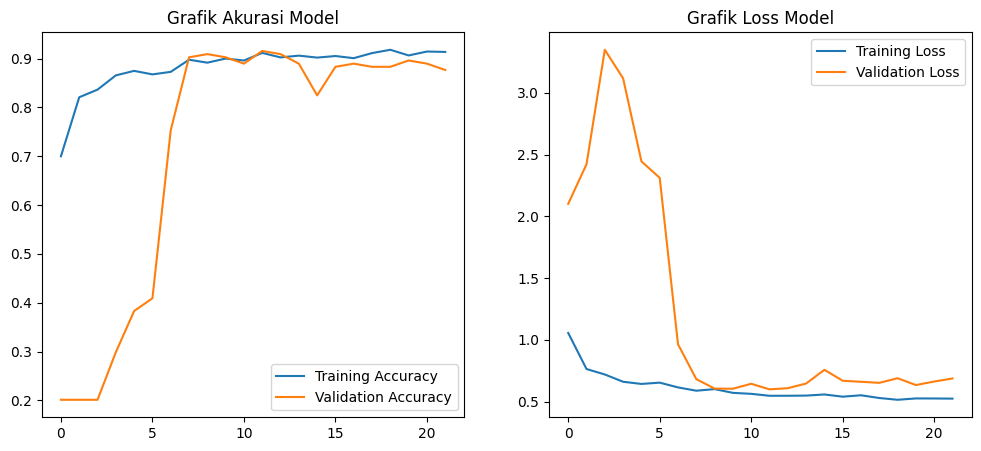

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Grafik Akurasi Model')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Grafik Loss Model')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step


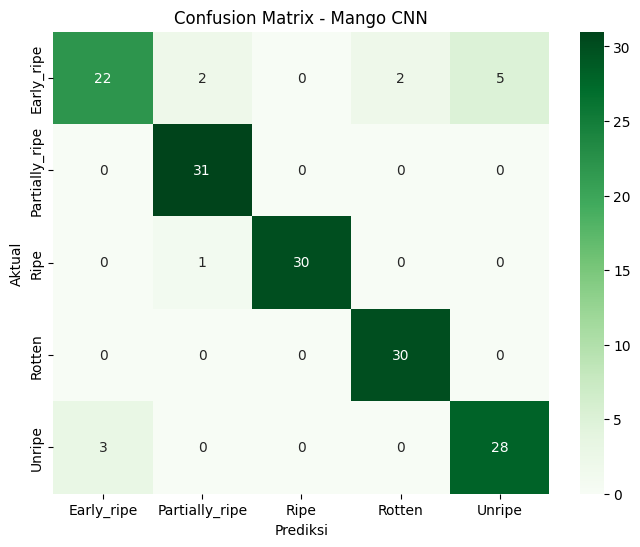

=== Classification Report ===
                precision    recall  f1-score   support

    Early_ripe       0.88      0.71      0.79        31
Partially_ripe       0.91      1.00      0.95        31
          Ripe       1.00      0.97      0.98        31
        Rotten       0.94      1.00      0.97        30
        Unripe       0.85      0.90      0.88        31

      accuracy                           0.92       154
     macro avg       0.92      0.92      0.91       154
  weighted avg       0.92      0.92      0.91       154



In [ ]:
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)

# Label sesuai urutan training
labels = list(train_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(val_gen.classes, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Mango CNN')
plt.show()

# Classification Report
print("=== Classification Report ===")
print(classification_report(val_gen.classes, y_pred, target_names=labels))

In [ ]:
model.save('final_mango_cnn.keras')
print("✅ Model disimpan sebagai 'mango_cnn.keras'")

✅ Model disimpan sebagai 'mango_cnn.keras'
